# Business Intelligence - Group 53 - Assignment 2

## Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# ...

## Business understanding

In order to understand the data one should first of all understand the business. Below one can find a glossary of terms used in MMA (UFC) and their explanations.
* **Knockdown**:  A fight-ending strike. If a fighter loses consciousness ("goes limp") as a result of legal strikes it is declared a KO.
* **(Guard) pass**: A guard pass is simply a way for the fighter on top to get past the legs of the fighter on the bottom in order to reach a dominant position on the ground
* **Reversal**: Transition from a neutral or inferior position to a dominant position
* **Submission**: A submission is a combat sports term for yielding to the opponent, and hence resulting in an immediate defeat. The submission - then also referred to as a "tap out" or "tapping out" - is often performed by visibly tapping the floor or the opponent with the hand or in some cases with the foot, or by saying the word 'tap' to signal the opponent and/or the referee of the submission
* **Takedown**: A takedown is a technique that involves off-balancing an opponent and bringing him or her to the ground with the attacker landing on top.
* **Strikes**: There are two different groupings for strikes. 
  * based on body sections: **HEAD**, **BODY**, **LEG** 
  * based on positions/ranges
    * **Clinch**: A position in which two standing individuals have grabbed ahold of one another. Strikes given and taken in a clinch position.
    * **Ground**: Strikes given and taken when the fighters are on the ground
    * **Distance**: Distance strikes are all strikes that are not clinche-strikes or ground strikes. This is the most common type of striking.
* **Stance**: Which foot is placed closer to the opponent. E.g. left in orthodox stance and right in southpaw


## Data understanding

Analyze the characteristics of the dataset (size, attribute types and semantics as discussed in class, value ranges, sparsity, min/max values, outliers, missing values, ...), and describe this in the report

### Data description

Following clustering of attributes is based on logical grouping and not on the attribute type. Many attributes are prefixed with either 'r' or 'b' which stands for red or blue fighter. To not copy every attribute description for each prefix those attributes in the following tables are prefixed with b/r_.

#### Bout stats
Attribute | Description | Attribute type 
--- | --- | ---
Referee | Name of Referee | Nominal
location | Fight location | Nominal
weight_class | Weight class of this bout and fighters | Ordinal
Date | Date of fight | Ordinal
title_bout | Stating whether the bout was a title bout | Binary
Winner | Winner of the fight | Nominal
no_of_rounds | Number of rounds the bout had. | Ratio

#### Basic fighter stats
Attribute | Description | Attribute type 
--- | --- | ---
b/r_fighter | Name of respective fighter | Nominal
b/r_Stance | Fighting stance | Nominal
b/r_age | Age of fighter | Ratio
b/r_Height_cms | The fighter's height | Ratio
b/r_Reach_cms | The fighter's reach | Ratio
b/r_Weight_lbs | The fighter's weight in lbs | Ratio

#### Fighter bout stats
Attribute | Description | Attribute type 
--- | --- | ---
b/r_win_by_Decision_Majority | Wins by Decision of the majority | Ratio
b/r_win_by_Decision_Split | Wins by Decision Split | Ratio
b/r_win_by_Decision_Unanimous | Wins by Decision Unanimous | Ratio
b/r_win_by_KO/TKO | Wins by Knockout or technical Knockout | Ratio
b/r_win_by_Submission | Wins by submission | Ratio
b/r_win_by_TKO_Doctor_Stoppage | Wins due to doctor stopping the fight | Ratio
b/r_wins | Total number of wins for the fighter | Ratio
b/r_losses | Total number of losses for the fighter | Ratio
b/r_draw | How many draws did the fighter have | Ratio
b/r_current_lose_streak | How many fights did the fighter lose in a row since last win | Ratio
b/r_current_win_streak | How many fights did the fighter win in a row since the last loss | Ratio
b/r_longest_win_streak | How many fights did the fighter win in a row at his/her longest | Ratio
b/r_total_rounds_fought | Number of rounds the fighter fought in total | Ratio
b/r_total_time_fought(seconds) | Total fighting time in seconds | Ratio
b/r_total_title_bouts | How many title bouts did the fighter have so far | Ratio

#### Fighter infight moves stats 
Attribute | Description | Attribute type 
--- | --- | ---
b/r_avg_BODY_att | Average body attacks attended (fighter level) | Ratio
b/r_avg_BODY_landed | Average attacks landed (fighter level) | Ratio
b/r_avg_HEAD_att | Average head attacks attended (fighter level) | Ratio
b/r_avg_HEAD_landed | Average head attacks landed (fighter level) | Ratio
b/r_avg_LEG_att |  Average leg attacks attended (fighter level) | Ratio
b/r_avg_LEG_landed |  Average leg attacks landed (fighter level) | Ratio
b/r_avg_CLINCH_att | Average clinches attended (fighter level) | Ratio
b/r_avg_CLINCH_landed | Average clinches landed (fighter level) | Ratio
b/r_avg_DISTANCE_att | Average distance strikes attended (fighter level) | Ratio
b/r_avg_DISTANCE_landed | Average distance strikes landed (fighter level) | Ratio
b/r_avg_GROUND_att | Average ground strikes attended (fighter level) | Ratio
b/r_avg_GROUND_landed | Average ground strikes landed (fighter level) | Ratio
b/r_avg_SIG_STR_att | Average significant strikes attended (fighter level) | Ratio
b/r_avg_SIG_STR_landed | Average significant strikes landed (fighter level) | Ratio
b/r_avg_SIG_STR_pct | | Ratio
b/r_avg_TD_att | Average tackedowns (fighter level) | Ratio
b/r_avg_TD_landed | Average tackedowns landed (fighter level) | Ratio
b/r_avg_TD_pct | | Ratio
b/r_avg_TOTAL_STR_att | Average total strikes attended (fighter level) | Ratio
b/r_avg_TOTAL_STR_landed | Average total strikes landed (fighter level) | Ratio
b/r_avg_KD | Average knockdowns (fighter level) | Ratio
b/r_avg_PASS | Average passes (fighter level) | Ratio
b/r_avg_REV | Average reversals (fighter level) | Ratio
b/r_avg_SUB_ATT | Average submissions (fighter level) | Ratio

#### Unknown attributes
Attribute | Description | Attribute type 
--- | --- | ---
b/r_avg_opp_BODY_att | Average body attacks attended (fighter level) | Ratio
b/r_avg_opp_BODY_landed | Average attacks landed (fighter level) | Ratio
b/r_avg_opp_HEAD_att | Average head attacks attended (fighter level) | Ratio
b/r_avg_opp_HEAD_landed | Average head attacks landed (fighter level) | Ratio
b/r_avg_opp_LEG_att |  Average leg attacks attended (fighter level) | Ratio
b/r_avg_opp_LEG_landed |  Average leg attacks landed (fighter level) | Ratio
b/r_avg_opp_CLINCH_att | Average clinches attended (fighter level) | Ratio
b/r_avg_opp_CLINCH_landed | Average clinches landed (fighter level) | Ratio
b/r_avg_opp_DISTANCE_att | Average distance strikes attended (fighter level) | Ratio
b/r_avg_opp_DISTANCE_landed | Average distance strikes landed (fighter level) | Ratio
b/r_avg_opp_GROUND_att | Average ground strikes attended (fighter level) | Ratio
b/r_avg_opp_GROUND_landed | Average ground strikes landed (fighter level) | Ratio
b/r_avg_opp_SIG_STR_att | Average significant strikes attended (fighter level) | Ratio
b/r_avg_opp_SIG_STR_landed | Average significant strikes landed (fighter level) | Ratio
b/r_avg_opp_SIG_STR_pct | | Ratio
b/r_avg_opp_TD_att | Average tackedowns (fighter level) | Ratio
b/r_avg_opp_TD_landed | Average tackedowns landed (fighter level) | Ratio
b/r_avg_opp_TD_pct | | Ratio
b/r_avg_opp_TOTAL_STR_att | Average total strikes attended (fighter level) | Ratio
b/r_avg_opp_TOTAL_STR_landed | Average total strikes landed (fighter level) | Ratio
b/r_avg_opp_KD | Average knockdowns (fighter level) | Ratio
b/r_avg_opp_PASS | Average passes (fighter level) | Ratio
b/r_avg_opp_REV | Average reversals (fighter level) | Ratio
b/r_avg_opp_SUB_ATT | Average submissions (fighter level) | Ratio

In [23]:
def load_ufc_data():
    
    path = Path("../data/data.csv")
    ufc_data = pd.read_csv(path, header=0, delimiter=",")
    
    return ufc_data

data_ufc = load_ufc_data()

# Average, Min/max values, Variance, standard deviation, mode, skewness, Correlation between attributes
# Cross-check semantics and attribute values!
# Check data volumes 

def basic_statistics(data):
    print(data.describe())

def semantics_check():
    # b/r_current_win_streak < b/r_wins
    # b/r_current_loss_streak < b/r_losses 
    # b/r_wins = b/r_win_by_Decision_Majority + b/r_win_by_Decision_Split + b/r_win_by_Decision_Unanimous 
    # +b/r_win_by_KO/TKO + b/r_win_by_Submission + b/r_win_by_TKO_Doctor_Stoppage
    data_ufc_check = data_ufc.copy()
    data_ufc_check.dropna(inplace=True)
       
    # Signficant strikes must equal the sum of each categorized strike group's characteristics  
    assert np.allclose(data_ufc_check.loc[:,'R_avg_SIG_STR_att'],
                data_ufc_check.loc[:,['R_avg_CLINCH_att','R_avg_DISTANCE_att',
                                      'R_avg_GROUND_att']].sum(axis=1), 
                rtol=0.00001)
    assert np.allclose(data_ufc_check.loc[:,'R_avg_SIG_STR_att'],
                data_ufc_check.loc[:,['R_avg_BODY_att','R_avg_HEAD_att','R_avg_LEG_att']].sum(axis=1), 
                rtol=0.00001)
    assert np.allclose(data_ufc_check.loc[:,['R_avg_CLINCH_att','R_avg_DISTANCE_att',
                                             'R_avg_GROUND_att']].sum(axis=1),
                data_ufc_check.loc[:,['R_avg_BODY_att','R_avg_HEAD_att','R_avg_LEG_att']].sum(axis=1), 
                rtol=0.00001)
    
    # Strikes based on body sections and positions/ranges
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_HEAD_att'].values,
                   data_ufc_check.loc[:,'R_avg_HEAD_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_BODY_att'].values,
                   data_ufc_check.loc[:,'R_avg_BODY_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_LEG_att'].values,
                   data_ufc_check.loc[:,'R_avg_LEG_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_CLINCH_att'].values,
                   data_ufc_check.loc[:,'R_avg_CLINCH_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_DISTANCE_att'].values,
                   data_ufc_check.loc[:,'R_avg_DISTANCE_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_GROUND_att'].values,
                   data_ufc_check.loc[:,'R_avg_GROUND_landed'].values).all()
    
    # Takedowns, significant strikes, total strikes
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_SIG_STR_att'].values,
                   data_ufc_check.loc[:,'R_avg_SIG_STR_landed'].values).all()  
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_TD_att'].values,
                   data_ufc_check.loc[:,'R_avg_TD_landed'].values).all()
    assert np.greater_equal(data_ufc_check.loc[:,'R_avg_TOTAL_STR_att'].values,
                   data_ufc_check.loc[:,'R_avg_TOTAL_STR_landed'].values).all()
    return "Assertions passed. Check the assertions to learn more about the semantics of this data set."
semantics_check()

data_ufc_clean = data_ufc.copy()
data_ufc_clean.dropna(inplace=True)

data_ufc_basic_fighter_stats = data_ufc.loc[:,['R_age', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms']]
data_ufc_basic_bout_stats = data_ufc.loc[:,['no_of_rounds']]
data_ufc_fighter_bout_stats = data_ufc.loc[:,['R_win_by_Decision_Majority',
                                              'R_win_by_Decision_Split',
                                              'R_win_by_Decision_Unanimous',
                                              'R_win_by_KO/TKO',
                                              'R_win_by_Submission',
                                              'R_win_by_TKO_Doctor_Stoppage',
                                              'R_wins',
                                              'R_losses',
                                              'R_draw',
                                              'R_current_lose_streak',
                                              'R_current_win_streak',
                                              'R_longest_win_streak',
                                              'R_total_rounds_fought',
                                              'R_total_time_fought(seconds)',
                                              'R_total_title_bouts']]

data_ufc_fighter_infight_moves_stats = data_ufc.loc[:, ['R_avg_BODY_att',
                                                        'R_avg_BODY_landed',
                                                        'R_avg_HEAD_att',
                                                        'R_avg_HEAD_landed',
                                                        'R_avg_LEG_att',
                                                        'R_avg_LEG_landed',
                                                        'R_avg_CLINCH_att',
                                                        'R_avg_CLINCH_landed',
                                                        'R_avg_DISTANCE_att',
                                                        'R_avg_DISTANCE_landed',
                                                        'R_avg_GROUND_att',
                                                        'R_avg_GROUND_landed',
                                                        'R_avg_SIG_STR_att',
                                                        'R_avg_SIG_STR_landed',
                                                        'R_avg_SIG_STR_pct',
                                                        'R_avg_TD_att',
                                                        'R_avg_TD_landed',
                                                        'R_avg_TD_pct',
                                                        'R_avg_TOTAL_STR_att',
                                                        'R_avg_TOTAL_STR_landed',
                                                        'R_avg_KD',
                                                        'R_avg_PASS',
                                                        'R_avg_REV',
                                                        'R_avg_SUB_ATT']]

print("Basic fighter stats")
basic_statistics(data_ufc_basic_fighter_stats)

print("Bout stats")
basic_statistics(data_ufc_basic_bout_stats)

print("Fighter bout stats")
basic_statistics(data_ufc_fighter_bout_stats)

print("Fighter infight moves stats")
basic_statistics(data_ufc_fighter_infight_moves_stats)



Basic fighter stats
             R_age  R_Height_cms  R_Weight_lbs  R_Reach_cms
count  5080.000000   5140.000000   5141.000000  4828.000000
mean     29.442323    179.274089    172.075861   183.664412
std       4.141927      8.638978     35.164075    10.304375
min      19.000000    152.400000    115.000000   152.400000
25%      26.000000    172.720000    145.000000   177.800000
50%      29.000000    180.340000    170.000000   182.880000
75%      32.000000    185.420000    185.000000   190.500000
max      47.000000    210.820000    345.000000   213.360000
Bout stats
       no_of_rounds
count   5144.000000
mean       3.119362
std        0.631457
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Fighter bout stats
       R_win_by_Decision_Majority  R_win_by_Decision_Split  \
count                 5144.000000              5144.000000   
mean                     0.027605                 0.280910   
std                      0.166210           

### Data exploration

['Bantamweight' "Women's Flyweight" 'Lightweight' 'Heavyweight' "Women's Strawweight" 'Featherweight' 'Middleweight' 'Light Heavyweight' 'Welterweight' "Women's Bantamweight" "Women's Featherweight" 'Flyweight' 'Catch Weight' 'Open Weight']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000145B9108>, <matplotlib.axes._subplots.AxesSubplot object at 0x00000000145E0D88>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x000000001461A948>, <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014651788>]], dtype=object)

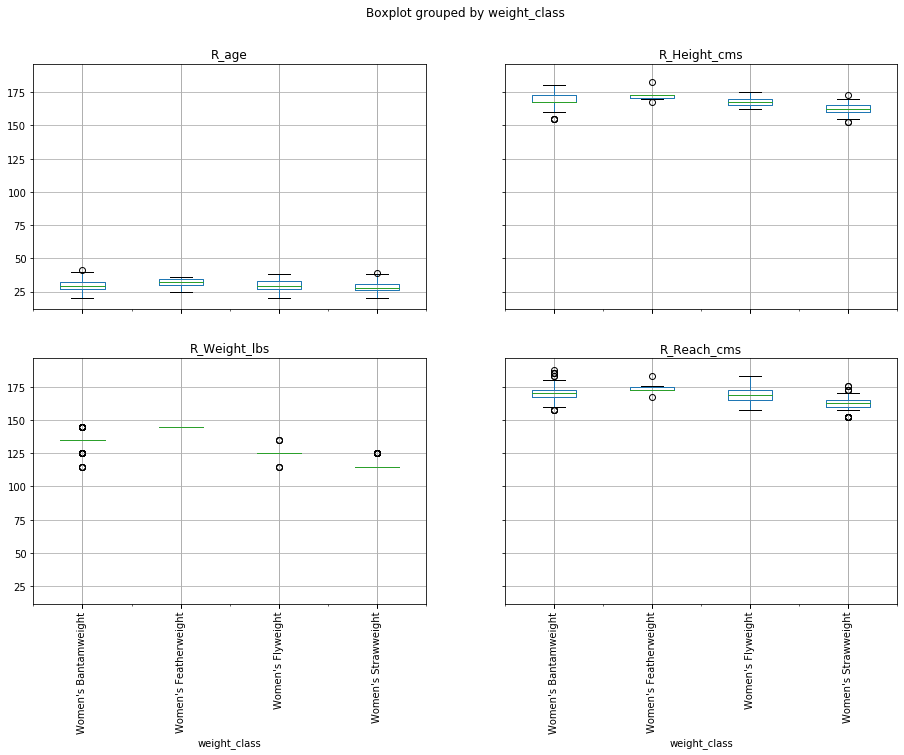

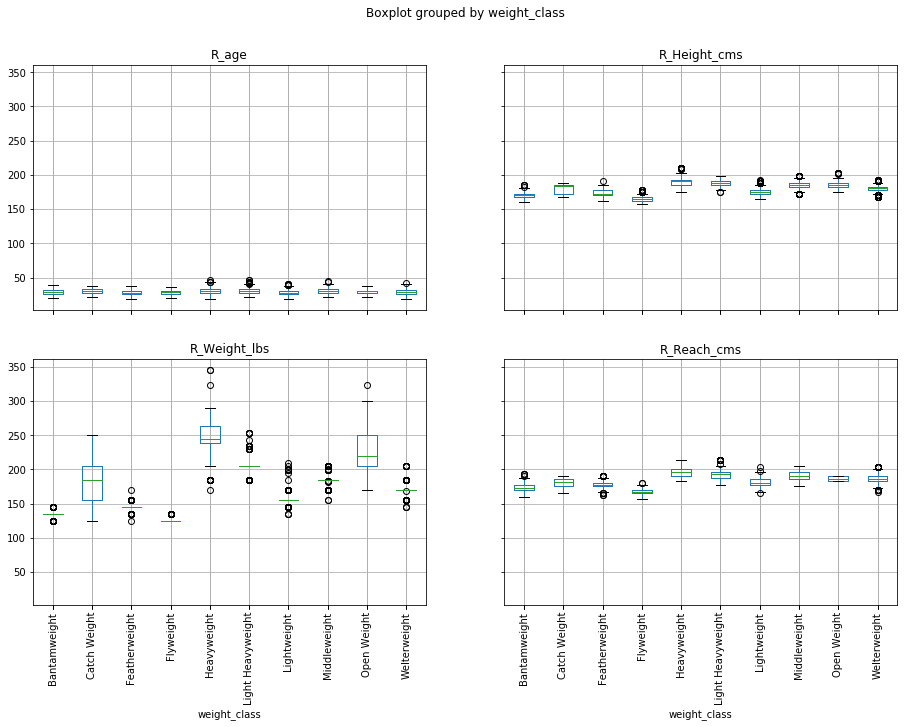

In [31]:
# Visual exploration
# Plot basic statistics
# Identify interesting subpopulations
## E.g. only male fighters and only 4-5 most popular weight classes
# Form hypotheses and identify actions
## E.g. which attributes do contribute significantly to the weight class
# Transform the hypothesis into a data mining goal, if possible
print(data_ufc['weight_class'].unique())
data_ufc_women = data_ufc[data_ufc['weight_class'].isin(["Women's Flyweight",
                                                         "Women's Strawweight",
                                                         "Women's Bantamweight",
                                                         "Women's Featherweight"])]
data_ufc_men = data_ufc[~data_ufc.isin(data_ufc_women)]
data_ufc_women.boxplot(column = ['R_age', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms'],
                 by='weight_class',
                 figsize=(15,10),
                 rot = 90)
data_ufc_men.boxplot(column = ['R_age', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms'],
                 by='weight_class',
                 figsize=(15,10),
                 rot = 90)




### Data quality

In [8]:
# Identify special values and catalog their meaning
# Find missing values and outliers.
# Check for deviations, decide whether it is “noise” or may indicate an interesting phenomenon.
# Check for plausability of values
# Verify that the meanings of attributes and contained values fit
## R_avg_BODY_att is not always bigger than R_avg_BODY_landed
# Establish the meaning of missing data ! Why is it missing?


## Data preparation 

### Select data

Subsampling: If the entire dataset is too large to be processed in its entirety, choose a subsampling strategy to get the dataset to a manageable size. Describe in your report why and how you did it. Make sure your experiment is repeatable. (No manual selection of instances, everything must be in code.)

### Clean data

In [ ]:
# Handle missing values and outliers
# eg. by deletion or imputation

### Construct data

Preprocessing: Get the data into the form needed for training your two algorithms. Describe your preprocessing steps (e.g. transcoding, scaling), why you did it and how you did it

In [ ]:
# Transform to different attribute types (Binning, 1-to-n coding, …)
# Add new attributes to the accessed data
# Decide if any attribute should be normalized
# 

In [ ]:
MY ANSWER HERE

## Modeling 

Pick two significantly different classification algorithms, i.e. NO two variations of the same algorithm.
* SVM and Random Forest
* Class attribute: weight_class

### Modeling technique

Describe why you chose the respective algorithms and briefly summarize their characteristics and the semantics underlying its parameters.

MY ANSWER HERE

### Test desgin

The model will be tested using an incrementally varying train/test split approach. We will start with a split of 5%/95% (train/test) and increment the split ratio by 10% until 95%/5% is reached.
For each training set size we will perform multiple runs to observe the sensitivity to the actual subset used for training a specific run.

In [ ]:
# Scaling
# Paramters
## Explore paramters with Grid Search and cross validation
# Training and test

### Build Model

Train your two algorithms in 3 separate experiment tracks as detailed below and evaluate your results with a reasonable quality measure for your algorithms (e.g.: (micro/macro) Precision/Recall, Mean Absolute Error,…). Interpret your results using both graphs and summaries (e.g. confusion matrices). For each of the 3 experiment tracks you should separately vary and document:
* Parameters: If the classifier has specific parameters, explore their effect with different settings using 10-fold cross-validation and document the parameters and the results and analyze the sensitivity of classification outcomes against these parameters. Specifically, test extreme/obviously wrong settings and analyze the results
* Scaling: where possible, try different scaling approaches (min/max, zero mean/unit variance, length) using the best parameters identified above and observe the difference in classification performance using 10-fold cross-validation. Analyze the reasons for the effects observed, test useful and also non-useful (!) scalings and summarize your findings as well as analyze reasons why specific scalings make sense in a given setting.
* Training / test set splits: Use the best parameter setting and scaling identified above and evaluate the effect of different training and test set splits. Start with a small training set and increase it in small increments (e.g. 10 sets from 5% / 95% (train/test) in 10%-increments to 95%/5% (train/test)) and observe performance changes. Perform multiple runs with each training set size to observe the sensitivity to the actual subset used for training a specific run. Analyze the variance in performance obtained

### Asses Model

## Summary

* What trends do you observe in each set of experiments?
* How easy was it to interpret the algorithm and its performance?
* Which classes are most frequently mixed-up? (and why?)
* What parameter settings cause performance changes?
* Do both algorithms show the same behavior in performance, performance degradation / robustness against
  * smaller and larger training set sizes?
  * variations in parameter settings?
* Did you observe or can you force and document characteristics such as over-learning?
* How does the performance change with different amounts of training data being available? What are the best scalings (per attribute / per vector) and why?



MY ANSWER HERE